In [1]:
import matplotlib.pyplot as plt
import numpy as np

from Faster_Delaunay import delauney_boundary
from path_finding import path_finding
from splines import generate_increment_on_path
# from control import control
from typing import List

In [27]:
example = [{"Label": "Yellow", "Zpos": None, "Ypos": 1.66, "Xpos": -1.16, "Time": None},  # A
           {"Label": "Blue", "Zpos": None, "Ypos": 1, "Xpos": 1, "Time": None},  # B
           {"Label": "Orange", "Zpos": None, "Ypos": 3.2, "Xpos": -0.14, "Time": None},  # C
           {"Label": "Orange", "Zpos": None, "Ypos": 2.68, "Xpos": 1.64, "Time": None},  # D
           {"Label": "Orange", "Zpos": None, "Ypos": 4.62, "Xpos": 1.26, "Time": None},  # E
           {"Label": "Orange", "Zpos": None, "Ypos": 3.42, "Xpos": 2.88, "Time": None},  # F
           {"Label": "Yellow", "Zpos": None, "Ypos": 4.98, "Xpos": 3.16, "Time": None}]  # G

In [28]:
def control(cones: List[dict]):
    oranges = []
    j = 0
    for i in range(len(cones)):
        cone = cones[i - j]
        if cone["Label"] == "Orange":
            del cones[i - j]
            oranges.append([cone["Xpos"], cone["Ypos"]])
            j += 1

    if len(oranges) == 2:
        print(np.array(oranges).shape)
        print(np.average(oranges, axis=0))

    print(cones)
    triangles, cones = delauney_boundary(cones)
    midpoints = path_finding(triangles, cones)
    target_point = generate_increment_on_path(midpoints)
    theta = np.arctan(target_point[0] / target_point[1])

    return theta

In [29]:
# triangles, cones = delauney_boundary(example)
# midpoints = path_finding(triangles, cones)
# next_point = generate_increment_on_path(midpoints)
theta = control(example)

(4, 2)
[1.41 3.48]
[{'Label': 'Yellow', 'Zpos': None, 'Ypos': 1.66, 'Xpos': -1.16, 'Time': None}, {'Label': 'Blue', 'Zpos': None, 'Ypos': 1, 'Xpos': 1, 'Time': None}, {'Label': 'Yellow', 'Zpos': None, 'Ypos': 4.98, 'Xpos': 3.16, 'Time': None}]


In [ ]:
midpoints

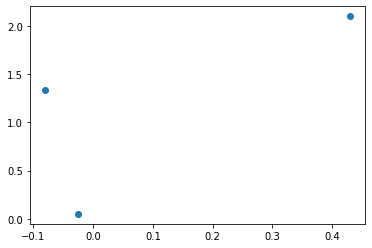

In [5]:
plt.scatter(list(midpoints[:, 0]) + [next_point[0]], list(midpoints[:, 1]) + [next_point[1]])

In [8]:
print(next_point)
print(midpoints[0])

[0.35863381 0.85780434]
[0.43 2.1 ]


In [12]:
abs(180 - theta * 360 / 2 * np.pi)

43.9314391581934

In [13]:
"Blue" == "Blue" == "Blue"

True

In [23]:
midpoints

array([[ 0.43,  2.1 ],
       [-0.08,  1.33]])